# Understanding Data

In [1]:
import pandas as pd

df = pd.read_csv('./data/mutationc.csv')


In [2]:
# Number of unique mutations contained in the data file
number_of_unique_mutations = df.columns[1:].shape[0]  # Exclude the first column which is the sample identifier
print(f"Number of unique mutations: {number_of_unique_mutations}") #Exclude the column for sample identifier

Number of unique mutations: 1144


In [3]:
# Number of individual samples contained in the data file
sample_num = df.shape[0]
print(f"Number of samples: {sample_num}")

Number of samples: 201


In [4]:
# Number of mutations for individual C1
c1_row = df[df.iloc[:, 0] == 'C1'].iloc[0, 1:]  # Select row for C1, exclude identifier column
num_mutations_c1 = (c1_row == 1).sum()
print(f"Number of mutations for individual C1: {num_mutations_c1}")

Number of mutations for individual C1: 46


In [5]:
# Number of mutations for individual NC1
nc1_row = df[df.iloc[:,0]=='NC1'].iloc[0,1:] # Select row for NC1, exclude identifier column
num_mutations_nc1 = (nc1_row == 1).sum()
print(f"Number of mutations for individual NC1: {num_mutations_nc1}")

Number of mutations for individual NC1: 6


In [6]:
# The average number of mutations per individual
mutation_data = df.iloc[:,1:] #data excluding classifier
total_mutations = (mutation_data==1).sum(axis=1).sum()
avg_mutations_per_individual = total_mutations/sample_num
print(f"Average number of mutations per individual: {avg_mutations_per_individual:.3f}")

Average number of mutations per individual: 15.104


In [7]:
#The minimum and maximum number of mutations per individual
mutation_counts = (mutation_data==1).sum(axis=1)
max_idx = mutation_counts.idxmax()
min_idx = mutation_counts.idxmin()

max_id = df.iloc[max_idx,0]
min_id = df.iloc[min_idx,0]

print(f"Maximum number of mutations is {mutation_counts[max_idx]} for individual {max_id}")
print(f"Minimum number of mutations is {mutation_counts[min_idx]} for individual {min_id}")

Maximum number of mutations is 204 for individual C0
Minimum number of mutations is 1 for individual NC4


In [8]:
# Number of individuals who have a mutation in the ‘BRAF’ gene
braf_cols = df.columns[df.columns.str.contains('BRAF')]
num_braf_mutations = (df[braf_cols] == 1).sum(axis=1)
num_individuals_braf = (num_braf_mutations > 0).sum()
print(f"Number of individuals with a mutation in the ‘BRAF’ gene: {num_individuals_braf}")

Number of individuals with a mutation in the ‘BRAF’ gene: 33


In [9]:
# Number of individuals who have a mutation in the ‘KRAS’ gene
kras_cols = df.columns[df.columns.str.contains('KRAS')]
num_kras_mutations = (df[kras_cols] == 1).sum(axis=1)
num_individuals_kras = (num_kras_mutations > 0).sum()
print(f"Number of individuals with a mutation in the ‘KRAS’ gene: {num_individuals_kras}")


Number of individuals with a mutation in the ‘KRAS’ gene: 72


In [10]:
# The average number of individuals per mutation
avg_individuals_per_mutation = total_mutations/number_of_unique_mutations
print(f"Average number of individuals per mutation: {avg_individuals_per_mutation:.3f}")


Average number of individuals per mutation: 2.654


In [11]:
# The minimum and maximum number of individuals per mutation
mutation_counts_col = (mutation_data == 1).sum(axis=0)
min_individuals_per_mutation = mutation_counts_col.min()
max_individuals_per_mutation = mutation_counts_col.max()
min_mutation_name = mutation_counts_col.idxmin()
max_mutation_name = mutation_counts_col.idxmax()

print(f"Minimum number of individuals for a mutation: {min_individuals_per_mutation} ({min_mutation_name})")
print(f"Maximum number of individuals for a mutation: {max_individuals_per_mutation} ({max_mutation_name})")

Minimum number of individuals for a mutation: 1 (HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T)
Maximum number of individuals for a mutation: 42 (KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G)


# Preprocessing Data

In [12]:
import matplotlib.pyplot as plt

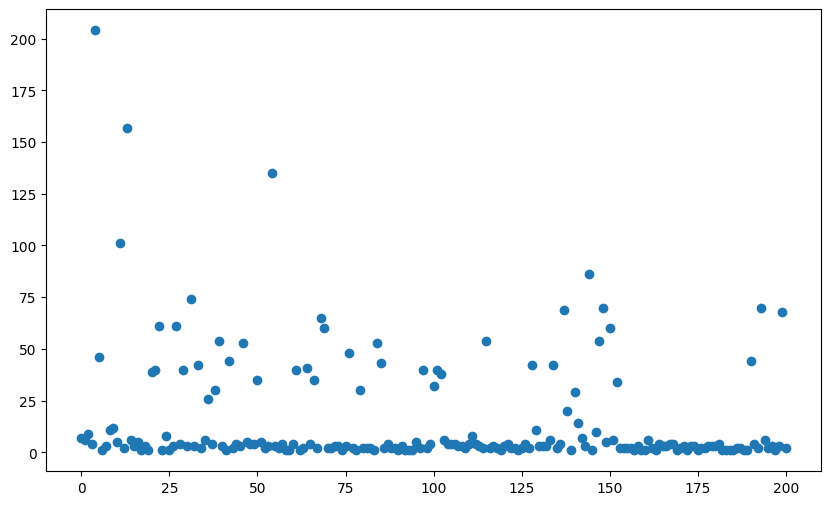

In [13]:
#  identify outlier samples with scatterplot
total_mutations_each_sample = (mutation_data==1).sum(axis=1)
plt.figure(figsize=(10,6))
plt.scatter(df.index,total_mutations_each_sample)

In [14]:
import plotly.express as px

# 1. Outlier samples (interactive)
fig1 = px.scatter(
    x=df.iloc[:,0], 
    y=total_mutations_each_sample, 
    labels={'x': 'Sample Identifier', 'y': 'Total Mutations per Sample'},
    title="Mutations per Sample"
)
fig1.update_traces(marker=dict(size=10), hovertemplate='Sample: %{x}<br>Mutations: %{y}')
fig1.show()

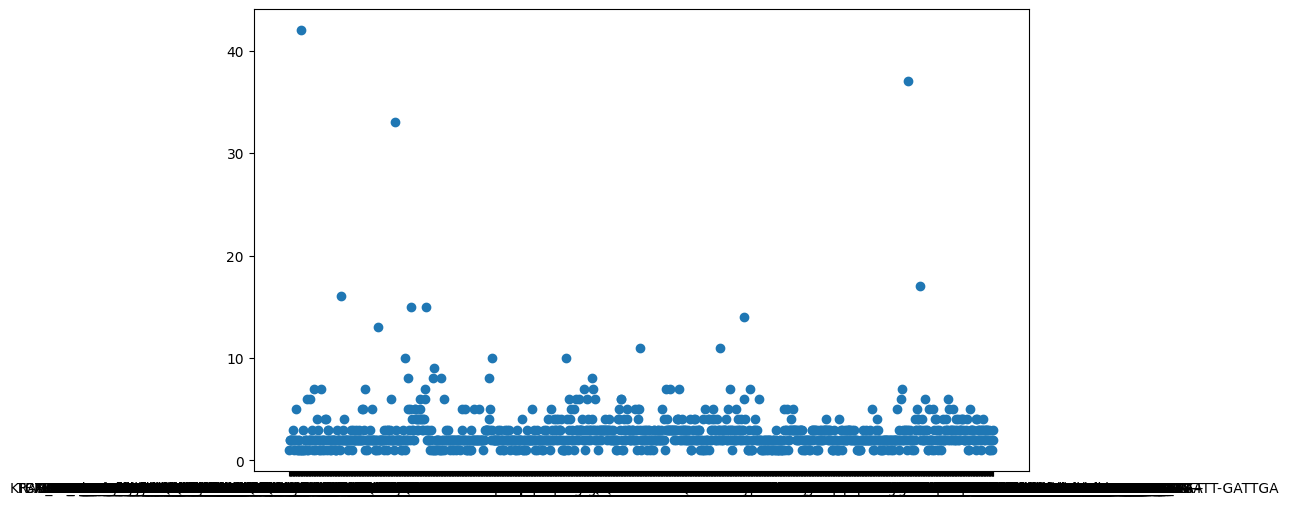

In [15]:
# identify outlier mutations with scatterplot
mutation_each_individual = (mutation_data==1).sum(axis=0)
plt.figure(figsize=(10,6))
plt.scatter(mutation_data.columns,mutation_each_individual)

In [16]:
fig2 = px.scatter(
    x=mutation_data.columns, 
    y=mutation_each_individual, 
    labels={'x': 'Mutation Name', 'y': 'Number of Individuals with Mutation'},
    title="Individuals per Mutation"
)
fig2.update_traces(marker=dict(size=10), hovertemplate='Mutation: %{x}<br>Individuals: %{y}')
fig2.update_xaxes(showticklabels=False)
fig2.show()

## Explore how the individual genetic mutations relate to the two categories of samples.

In [17]:
# top 10 features (mutations) when ranked by T (total occurrences in all samples)
sorted_mutation_counts = mutation_each_individual.sort_values(ascending=False)
sorted_mutation_counts.head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    42
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               37
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               33
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               17
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                 16
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               15
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                15
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                  14
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  13
APC_GRCh37_5:112174631-112174631_Nonsense-Mutation_SNP_C-C-T                11
dtype: int64

In [18]:
# top 10 features (mutations) when ranked by C (total occurrences in C samples)
identifier_col = df.columns[0] 

df_C = df[df[identifier_col].str.match(r'^C\d+$')]
df_C_mutation_data = df_C.iloc[:,1:]
mutation_each_individual_C = (df_C_mutation_data==1).sum(axis=0)
mutation_each_individual_C_sorted = mutation_each_individual_C.sort_values(ascending=False)
mutation_each_individual_C_sorted.head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               28
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               27
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    25
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               13
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               13
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                11
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  11
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                 10
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  8
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               7
dtype: int64

In [19]:
# top 10 features (mutations) when ranked by NC (total occurrences in NC samples)

df_NC = df[df[identifier_col].str.match(r'^NC\d+$')]
df_NC_mutation_data = df_NC.iloc[:,1:]
mutation_each_individual_NC = (df_NC_mutation_data==1).sum(axis=0)
mutation_each_individual_NC_sorted = mutation_each_individual_NC.sort_values(ascending=False)
mutation_each_individual_NC_sorted.head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               10
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T                   7
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                   7
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  6
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A                   6
TP53_GRCh37_17:7577539-7577539_Missense-Mutation_SNP_G-G-A                   6
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T                5
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T                 5
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 4
dtype: int64

In [20]:
# top 10 features (mutations) when ranked by %C (the percentage of ALL cancer samples containing mutation ‘i’)
mutation_each_individual_C_percentage = mutation_each_individual_C / df_C.shape[0] * 100
mutation_each_individual_C_percentage.sort_values(ascending=False).head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               26.923077
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               25.961538
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    24.038462
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               12.500000
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               12.500000
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                10.576923
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  10.576923
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  9.615385
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  7.692308
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
dtype: float64

In [21]:
# top 10 features (mutations) when ranked by %NC (the percentage of ALL non cancer samples containing mutation ‘i’)
mutation_each_individual_NC_percentage = mutation_each_individual_NC / df_NC.shape[0] * 100
mutation_each_individual_NC_percentage.sort_values(ascending=False).head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17.525773
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               10.309278
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T                   7.216495
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                   7.216495
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  6.185567
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A                   6.185567
TP53_GRCh37_17:7577539-7577539_Missense-Mutation_SNP_G-G-A                   6.185567
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T                5.154639
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T                 5.154639
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 4.123711
dtype: float64

In [22]:
# top 10 features (mutations) when ranked by %C - %NC
mutation_diff = mutation_each_individual_C_percentage - mutation_each_individual_NC_percentage
mutation_diff.sort_values(ascending=False).head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               21.768438
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               15.652260
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               10.438144
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                   8.515067
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                                8.376289
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--                   6.730769
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                             6.730769
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G     6.512688
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 6.453212
dtype: float64

In [23]:
# top 10 features (mutations) when ranked by %C / %NC
import numpy as np
safe_nc_percentage = mutation_each_individual_NC_percentage.replace(0, np.nan)
mutation_ratio = mutation_each_individual_C_percentage / safe_nc_percentage
mutation_ration_filled = mutation_ratio.fillna(0)
mutation_ratio.sort_values(ascending=False).head(10)


XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--        6.528846
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--      6.062500
UBQLN2_GRCh37_X:56591874-56591874_Frame-Shift-Del_DEL_C-C--        5.596154
MICAL3_GRCh37_22:18300932-18300932_Frame-Shift-Del_DEL_G-G--       5.596154
PIK3CA_GRCh37_3:178952085-178952085_Missense-Mutation_SNP_A-A-G    5.596154
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T      5.223077
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--         5.129808
PIK3CA_GRCh37_3:178936082-178936082_Missense-Mutation_SNP_G-G-A    4.663462
ZDHHC8_GRCh37_22:20130522-20130522_Frame-Shift-Del_DEL_C-C--       4.663462
APC_GRCh37_5:112116592-112116592_Nonsense-Mutation_SNP_C-C-T       4.663462
dtype: float64

# Classification

In [24]:
# Actual Cancer vs NC data
identifier_col
actual = df[identifier_col].str.match(r'^C\d+$').astype(int)  # 1 for Cancer, 0 for Non-Cancer

1st: KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G
                   Predicted Cancer  Predicted Non-Cancer
Actual Cancer                    25                    79
Actual Non-Cancer                17                    80


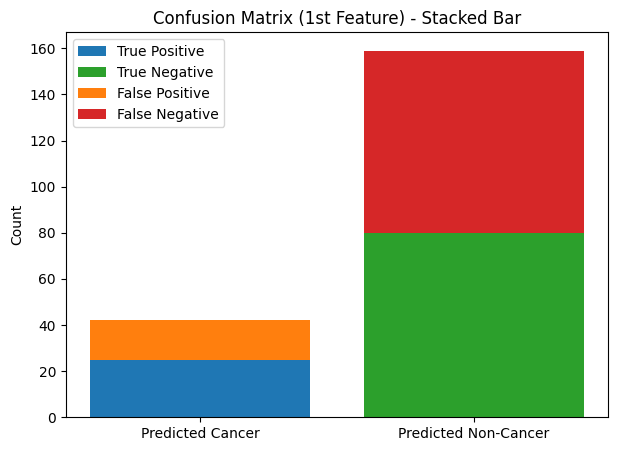

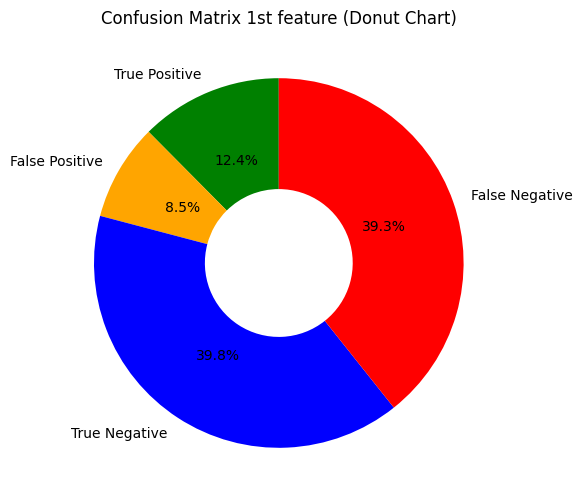

In [25]:
import matplotlib.pyplot as plt
# 1st feature when ranked by T confusion Matrix
features_1st_T_ranked = sorted_mutation_counts.index[0]
print("1st:", features_1st_T_ranked)

prediction_1 = df.loc[:, features_1st_T_ranked]
true_positive_1 = ((prediction_1 == 1) & (actual == 1)).sum()
true_negative_1 = ((prediction_1 == 0) & (actual == 0)).sum()
false_positive_1 = ((prediction_1 == 1) & (actual == 0)).sum()
false_negative_1 = ((prediction_1 == 0) & (actual == 1)).sum()

conf_matrix = pd.DataFrame({
    'Predicted Cancer': [true_positive_1, false_positive_1],
    'Predicted Non-Cancer': [false_negative_1, true_negative_1]
}, index=['Actual Cancer', 'Actual Non-Cancer'])

print(conf_matrix)

# Stacked bar chart
bar_labels = ['Predicted Cancer', 'Predicted Non-Cancer']
bar_bottom = [true_positive_1, true_negative_1]
bar_top = [false_positive_1, false_negative_1]

plt.figure(figsize=(7,5))
plt.bar(bar_labels, bar_bottom, label=['True Positive', 'True Negative'], color=['tab:blue', 'tab:green'])
plt.bar(bar_labels, bar_top, bottom=bar_bottom, label=['False Positive', 'False Negative'], color=['tab:orange', 'tab:red'])
plt.ylabel('Count')
plt.title('Confusion Matrix (1st Feature) - Stacked Bar')
plt.legend()
plt.show()

# Donut chart
labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']
values = [true_positive_1, false_positive_1, true_negative_1, false_negative_1]
colors = ['green', 'orange', 'blue', 'red'] 

# Create donut chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', # display percentages
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6)  # makes it a donut
)

ax.set(aspect="equal", title='Confusion Matrix 1st feature (Donut Chart)')
plt.show()

2nd: DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C
                   Predicted Cancer  Predicted Non-Cancer
Actual Cancer                    27                    77
Actual Non-Cancer                10                    87


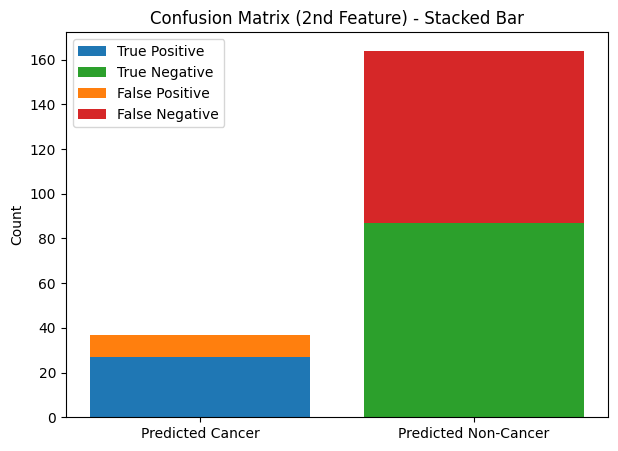

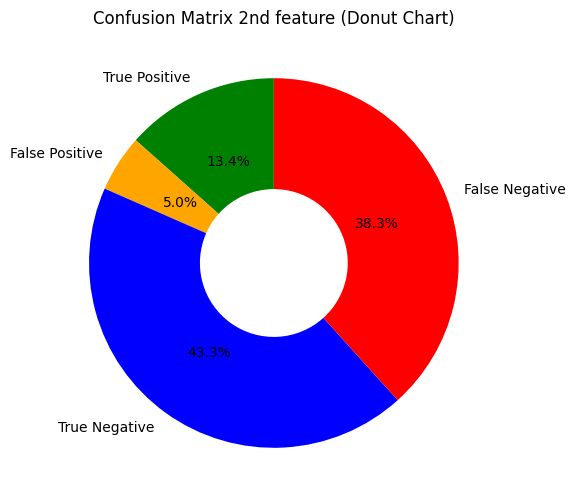

In [26]:
features_2nd_T_ranked = sorted_mutation_counts.index[1]
print("2nd:", features_2nd_T_ranked)
prediction_2 = df.loc[:, features_2nd_T_ranked]
true_positive_2 = ((prediction_2 == 1) & (actual == 1)).sum()
true_negative_2 = ((prediction_2 == 0) & (actual == 0)).sum()
false_positive_2 = ((prediction_2 == 1) & (actual == 0)).sum()
false_negative_2 = ((prediction_2 == 0) & (actual == 1)).sum()

conf_matrix_2 = pd.DataFrame({
    'Predicted Cancer': [true_positive_2, false_positive_2],
    'Predicted Non-Cancer': [false_negative_2, true_negative_2]
}, index=['Actual Cancer', 'Actual Non-Cancer'])

print(conf_matrix_2)

# Stacked bar chart
bar_labels = ['Predicted Cancer', 'Predicted Non-Cancer']
bar_bottom = [true_positive_2, true_negative_2]
bar_top = [false_positive_2, false_negative_2]

plt.figure(figsize=(7,5))
plt.bar(bar_labels, bar_bottom, label=['True Positive', 'True Negative'], color=['tab:blue', 'tab:green'])
plt.bar(bar_labels, bar_top, bottom=bar_bottom, label=['False Positive', 'False Negative'], color=['tab:orange', 'tab:red'])
plt.ylabel('Count')
plt.title('Confusion Matrix (2nd Feature) - Stacked Bar')
plt.legend()
plt.show()

# Donut chart
labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']
values = [true_positive_2, false_positive_2, true_negative_2, false_negative_2]
colors = ['green', 'orange', 'blue', 'red'] 

# Create donut chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', # display percentages
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6)  # makes it a donut
)

ax.set(aspect="equal", title='Confusion Matrix 2nd feature (Donut Chart)')
plt.show()

In [27]:
tp_list = []
fp_list = []

features = mutation_data.columns.tolist()
for feature in features:
    prediction = df.loc[:, feature]
    true_positive = ((prediction == 1) & (actual == 1)).sum()
    false_positive = ((prediction == 1) & (actual == 0)).sum()
    
    tp_list.append(true_positive)
    fp_list.append(false_positive)

tp_arr = np.array(tp_list)
fp_arr = np.array(fp_list)
tp_minus_fp = tp_arr - fp_arr
max_idx = np.argmax(tp_minus_fp)
best_feature = features[max_idx]
print(f"Best feature by (TP - FP): {best_feature} with TP - FP = {tp_minus_fp[max_idx]}")

Best feature by (TP - FP): BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T with TP - FP = 23


In [28]:
tp_percentage_arr = tp_arr/sample_num * 100
fp_percentage_arr = fp_arr/sample_num * 100
tp_minus_fp_percentage = tp_percentage_arr - fp_percentage_arr
max_idx_percentage = np.argmax(tp_minus_fp_percentage)
best_feature_percentage = features[max_idx_percentage]
print(f"Best feature by (%TP - %FP): {best_feature_percentage} with %TP - %FP = {tp_minus_fp_percentage[max_idx_percentage]:.2f}%")

Best feature by (%TP - %FP): BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T with %TP - %FP = 11.44%


# Decision Tree and Decision Rule

In [29]:
# Show the table of the top 10 features (ranked by their corresponding values of “TP – FP”)
sorted_tp_minus_fp = pd.Series(tp_minus_fp, index=features).sort_values(ascending=False)
sorted_tp_minus_fp.head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               23
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               17
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               11
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                                9
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                   9
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G     8
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--                   7
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 7
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               7
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                             7
dtype: int64

In [30]:
# Most Helpful feature when ranked by “TP - FP”
most_helpful_feature = sorted_tp_minus_fp.index[0]
print(f"Most Helpful feature when ranked by “TP - FP”: {most_helpful_feature} with TP - FP = {sorted_tp_minus_fp[most_helpful_feature]}")

Most Helpful feature when ranked by “TP - FP”: BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T with TP - FP = 23


In [31]:
# Confusion Matrix for the Most Helpful feature
prediction_most_helpful = df.loc[:, most_helpful_feature]
true_positive_most = ((prediction_most_helpful == 1) & (actual ==1)).sum()
true_negative_most = ((prediction_most_helpful == 0) & (actual ==0)).sum()
false_positive_most = ((prediction_most_helpful == 1) & (actual ==0)).sum()
false_negative_most = ((prediction_most_helpful == 0) & (actual ==1)).sum()

conf_matrix_most = pd.DataFrame({
    'Predicted Cancer': [true_positive_most, false_positive_most],
    'Predicted Non-Cancer': [false_negative_most, true_negative_most]
}, index=['Actual Cancer', 'Actual Non-Cancer'])
print(conf_matrix_most)

                   Predicted Cancer  Predicted Non-Cancer
Actual Cancer                    28                    76
Actual Non-Cancer                 5                    92


In [32]:
# Divide the samples into two groups by using the most helpful feature(F) to classify each sample as either have F nor not have F

group_A = []
group_B = []
for i in range(len(df)):
    if prediction_most_helpful[i] == 1:
        group_A.append(df.iloc[i,0])
    else:
        group_B.append(df.iloc[i,0])

print(f"Group A: {group_A}")

print(f"Group B: {group_B}")

Group A: ['C0', 'C1', 'C6', 'C7', 'C8', 'C9', 'C12', 'C15', 'C17', 'C19', 'NC25', 'C23', 'C24', 'C26', 'C33', 'C34', 'C38', 'C43', 'C46', 'NC42', 'C52', 'NC46', 'NC47', 'C63', 'C71', 'C73', 'NC63', 'C75', 'C77', 'C78', 'C79', 'C81', 'C94']
Group B: ['NC0', 'NC1', 'NC2', 'NC3', 'NC4', 'C2', 'C3', 'C4', 'C5', 'NC5', 'NC6', 'NC7', 'NC8', 'NC9', 'NC10', 'C10', 'NC11', 'NC12', 'NC13', 'C11', 'NC14', 'C13', 'NC15', 'NC16', 'C14', 'NC17', 'NC18', 'C16', 'NC19', 'NC20', 'NC21', 'C18', 'NC22', 'NC23', 'NC24', 'C20', 'C21', 'C22', 'NC26', 'NC27', 'C25', 'C27', 'NC28', 'C28', 'C29', 'NC29', 'C30', 'C31', 'C32', 'NC30', 'C35', 'C36', 'C37', 'NC31', 'C39', 'C40', 'C41', 'NC32', 'C42', 'C44', 'NC33', 'NC34', 'NC35', 'C45', 'NC36', 'NC37', 'NC38', 'C47', 'NC39', 'C48', 'C49', 'NC40', 'C50', 'NC41', 'NC43', 'C51', 'NC44', 'C53', 'NC45', 'C54', 'C55', 'C56', 'C57', 'C58', 'NC48', 'NC49', 'C59', 'NC50', 'C60', 'C61', 'NC51', 'C62', 'NC52', 'C64', 'C65', 'NC53', 'C66', 'C67', 'C68', 'C69', 'NC54', 'NC55'

# 2-layer decision tree

In [33]:
# filter out a df of only the samples in Group A
df_group_A = df[df[identifier_col].isin(group_A)]
print(df_group_A)

    Unnamed: 0  HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T  \
4           C0                                                  0              
5           C1                                                  0              
11          C6                                                  0              
13          C7                                                  0              
18          C8                                                  0              
20          C9                                                  0              
27         C12                                                  0              
33         C15                                                  0              
39         C17                                                  0              
42         C19                                                  0              
45        NC25                                                  0              
49         C23                          

In [34]:
tp_A_list = []
fp_A_list = []
for feature in features:
    prediction_A = df_group_A.loc[:, feature]
    actual_A = df_group_A[identifier_col].str.match(r'^C\d+$').astype(int)
    
    true_positive_A = ((prediction_A == 1) & (actual_A == 1)).sum()
    false_positive_A = ((prediction_A == 1) & (actual_A == 0)).sum()
    
    tp_A_list.append(true_positive_A)
    fp_A_list.append(false_positive_A)

tp_A_arr = np.array(tp_A_list)
fp_A_arr = np.array(fp_A_list)
tp_minus_fp_A = tp_A_arr - fp_A_arr
sorted_tp_minus_fp_A = pd.Series(tp_minus_fp_A, index=features).sort_values(ascending=False)
sorted_tp_minus_fp_A.head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T    23
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                    17
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                    10
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--     8
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--        8
XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--       7
MICAL3_GRCh37_22:18300932-18300932_Frame-Shift-Del_DEL_G-G--      6
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G       6
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--        6
CTNNBL1_GRCh37_20:36361416-36361416_Frame-Shift-Del_DEL_A-A--     5
dtype: int64

In [35]:
# Confusion Matrix for the Most Helpful feature in Group A
most_helpful_feature_A = sorted_tp_minus_fp_A.index[1]
print(f"Most Helpful feature in Group A: {most_helpful_feature_A} with TP - FP = {sorted_tp_minus_fp_A[most_helpful_feature_A]}")
actual_A = df_group_A[identifier_col].str.match(r'^C\d+$').astype(int)
true_negative_A_most = ((df_group_A[most_helpful_feature_A] == 0) & (actual_A ==0)).sum()
false_positive_A_most = ((df_group_A[most_helpful_feature_A] == 1) & (actual_A ==0)).sum()
false_negative_A_most = ((df_group_A[most_helpful_feature_A] == 0) & (actual_A ==1)).sum()
true_positive_A_most = ((df_group_A[most_helpful_feature_A] == 1) & (actual_A ==1)).sum()

conf_matrix_A_most = pd.DataFrame({
    'Predicted Cancer': [true_positive_A_most, false_positive_A_most],
    'Predicted Non-Cancer': [false_negative_A_most, true_negative_A_most]
}, index=['Actual Cancer', 'Actual Non-Cancer'])
print(conf_matrix_A_most)

Most Helpful feature in Group A: DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C with TP - FP = 17
                   Predicted Cancer  Predicted Non-Cancer
Actual Cancer                    19                     9
Actual Non-Cancer                 2                     3


In [36]:
# filter out a df of only the samples in Group B
df_group_B = df[df[identifier_col].isin(group_B)]
print(df_group_B)

    Unnamed: 0  HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T  \
0          NC0                                                  1              
1          NC1                                                  0              
2          NC2                                                  0              
3          NC3                                                  0              
6          NC4                                                  0              
..         ...                                                ...              
196       NC93                                                  0              
197       NC94                                                  0              
198       NC95                                                  0              
199       C103                                                  0              
200       NC96                                                  0              

     LRR1_GRCh37_14:50074349-50074349_M

In [37]:
tp_B_list = []
fp_B_list = []
for feature in features:
    prediction_B = df_group_B.loc[:, feature]
    actual_B = df_group_B[identifier_col].str.match(r'^C\d+$').astype(int)
    
    true_positive_B = ((prediction_B == 1) & (actual_B == 1)).sum()
    false_positive_B = ((prediction_B == 1) & (actual_B == 0)).sum()
    
    tp_B_list.append(true_positive_B)
    fp_B_list.append(false_positive_B)
tp_B_arr = np.array(tp_B_list)
fp_B_arr = np.array(fp_B_list)
tp_minus_fp_B = tp_B_arr - fp_B_arr
sorted_tp_minus_fp_B = pd.Series(tp_minus_fp_B, index=features).sort_values(ascending=False)
sorted_tp_minus_fp_B.head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    8
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                7
APC_GRCh37_5:112175951-112175952_Frame-Shift-Ins_INS_----A                  5
APC_GRCh37_5:112175639-112175639_Nonsense-Mutation_SNP_C-C-T                4
QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--                           4
APC_GRCh37_5:112116592-112116592_Nonsense-Mutation_SNP_C-C-T                4
PIK3CA_GRCh37_3:178936082-178936082_Missense-Mutation_SNP_G-G-A             4
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                            3
HCRTR2_GRCh37_6:55145214-55145214_Silent_SNP_G-G-A                          3
TP53_GRCh37_17:7577548-7577548_Missense-Mutation_SNP_C-C-T                  3
dtype: int64

In [38]:
# Confusion Matrix for the Most Helpful feature in Group B
most_helpful_feature_B = sorted_tp_minus_fp_B.index[0]
print(f"Most Helpful feature in Group B: {most_helpful_feature_B} with TP - FP = {sorted_tp_minus_fp_B[most_helpful_feature_B]}")
actual_B = df_group_B[identifier_col].str.match(r'^C\d+$').astype(int)
true_negative_B_most = ((df_group_B[most_helpful_feature_B] == 0) & (actual_B ==0)).sum()
false_positive_B_most = ((df_group_B[most_helpful_feature_B] == 1) & (actual_B ==0)).sum()
false_negative_B_most = ((df_group_B[most_helpful_feature_B] == 0) & (actual_B ==1)).sum()
true_positive_B_most = ((df_group_B[most_helpful_feature_B] == 1) & (actual_B ==1)).sum()

conf_matrix_B_most = pd.DataFrame({
    'Predicted Cancer': [true_positive_B_most, false_positive_B_most],
    'Predicted Non-Cancer': [false_negative_B_most, true_negative_B_most]
}, index=['Actual Cancer', 'Actual Non-Cancer'])
print(conf_matrix_B_most)

Most Helpful feature in Group B: KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G with TP - FP = 8
                   Predicted Cancer  Predicted Non-Cancer
Actual Cancer                    25                    51
Actual Non-Cancer                17                    75


In [48]:
# Create Decision Tree Classifier
from graphviz import  Digraph

dot = Digraph()

# Root node
dot.node("A", most_helpful_feature)

# Left child
dot.node("B", most_helpful_feature_A)
dot.edge("A", "B", label="Yes")

# Right child
dot.node("C", most_helpful_feature_B)
dot.edge("A", "C", label="No")

# Leaves
dot.node("D", "Class A1 (C)", shape="box")
dot.edge("B", "D", label="Yes")

dot.node("E", "Class A2 (NC)", shape="box")
dot.edge("B", "E", label="No")

dot.node("F", "Class B1 (C)", shape="box")
dot.edge("C", "F", label="Yes")

dot.node("G", "Class B2 (NC)", shape="box")
dot.edge("C", "G", label="No")

dot.render("tree", format="png", cleanup=True)

'tree.png'

Classification rule:
For sample S
if S has mutation most_helpful_feature (BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T) then
    if S has mutation most_helpful_feature_A (DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C)
    then classify S as C
    else classify S as NC
else
    if S has mutation most_helpful_feature_B (KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G)
    then classify S as C
    else classify S as NC

In [49]:
# Classify function
def classify_sample(sample_row):
    if sample_row[most_helpful_feature] == 1:
        if sample_row[most_helpful_feature_A] == 1:
            return 'C'  # Class A1
        else:
            return 'NC'  # Class A2
    else:
        if sample_row[most_helpful_feature_B] == 1:
            return 'C'  # Class B1
        else:
            return 'NC'  # Class B2

In [50]:
# classify the following samples C1, C10, C30, NC5, NC15
samples_to_classify = ['C1', 'C10', 'C30', 'NC5', 'NC15']
for sample_id in samples_to_classify:
    sample_row = df[df[identifier_col] == sample_id].iloc[0]
    classification = classify_sample(sample_row)
    print(f"Sample {sample_id} is classified as: {classification}")

Sample C1 is classified as: C
Sample C10 is classified as: NC
Sample C30 is classified as: NC
Sample NC5 is classified as: C
Sample NC15 is classified as: NC
